#リッジ回帰

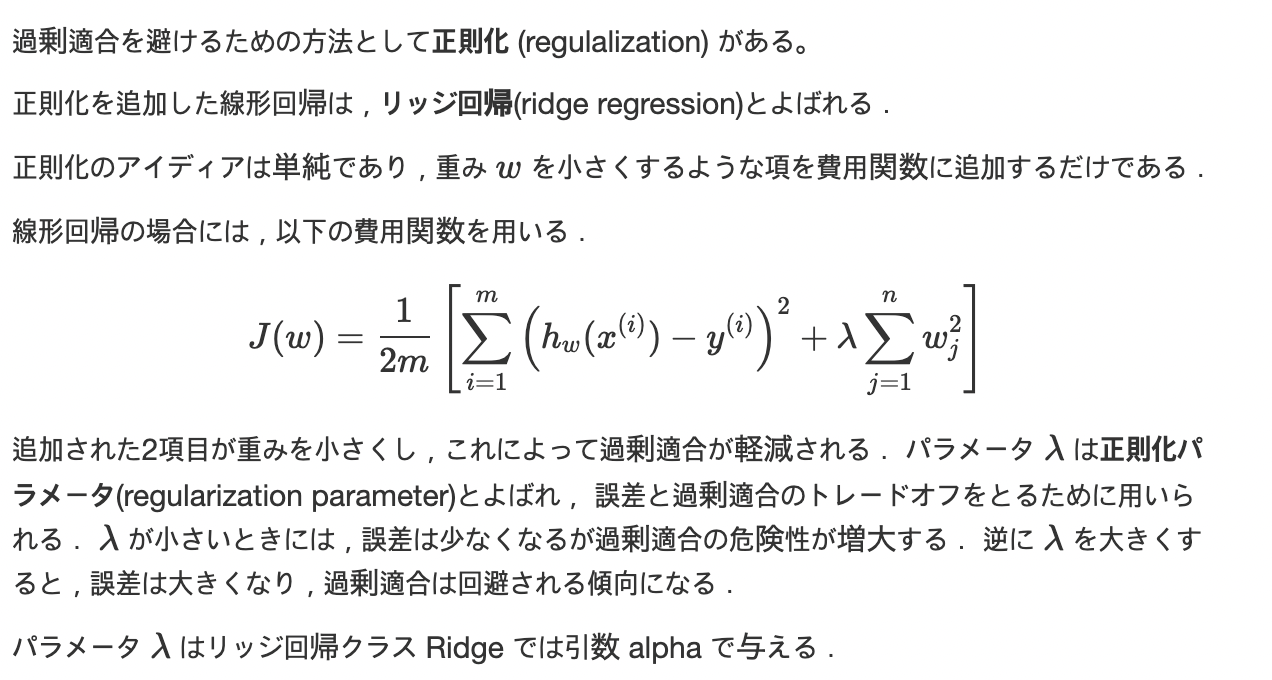

In [1]:
import pandas as pd
boston = pd.read_csv('http://logopt.com/data/Boston.csv',index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = boston.drop("medv",axis=1) # 最後の列以外のデータを独立変数（特徴ベクトル）として抽出
y = boston.medv #最後の列(medv)を従属変数として抽出

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30%のデータをテスト用，それ以外を訓練用に分離

# X_trainとy_trainの中にランダムにセレクトして70%のデータが入る
# X_testとy_test中にランダムにセレクトして30%のデータが入る

In [4]:
# リッジ回帰 - Wをあまり大きくしないようにする方法,訓練データに特化しないように(過剰適用しないように)作れる

from sklearn.linear_model import Ridge #クラスのインポート
reg = Ridge(alpha=10.0)     # リッジ回帰クラスのインスタンス生成,alphaをうまく調整する必要がある
reg.fit(X_train, y_train)    # 訓練
yhat = reg.predict(X_test)   # 予測
print(reg.score(X_test,y_test)) #決定係数

0.7457956211766583


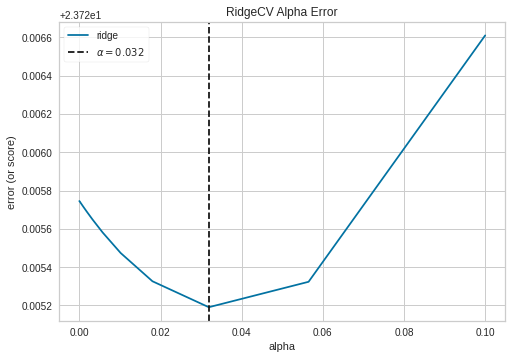

In [5]:
# 最も良い正則化パラメータalphaを求める．
# 後述する交差検証を使い，yellowbrickのAlphaSelectionで可視化する．

from sklearn.linear_model import  RidgeCV
from yellowbrick.regressor import AlphaSelection
import numpy as np

alphas = np.logspace(-100, -1, 400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show();

In [6]:
reg = Ridge(alpha=0.032)     # リッジ回帰クラスのインスタンス生成
reg.fit(X_train, y_train)    # 訓練
yhat = reg.predict(X_test)   # 予測
print(reg.score(X_test,y_test)) #決定係数

0.7580659492323883


In [7]:
# 問題（アヤメ，タイタニック，ダイヤモンド）
# 1,irisデータを訓練用とテスト用に分けてから，ロジスティック回帰による分類を行い，正解率を計算せよ．


In [8]:
# 2,titanicデータ訓練用とテスト用に分けてから，ロジスティック回帰による分類を行い，正解率を計算せよ．

In [9]:
# 3,例題2で用いた ダイアモンドの価格データhttp://logopt.com/data/Diamond.csv に対して線形回帰とリッジ回帰による予測を行え．また，訓練用とテスト用に分けて決定係数 R^2R 
# 2を計算し，評価せよ． ただしリッジ回帰の正則化パラメータは 0.03 と設定せよ．